<a href="https://colab.research.google.com/github/suganthialagumalai/suganthialagumalai/blob/main/SalaryDiscriminationAssessment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
Year. Number of years in current rank.
Degree. Highest degree. 1 for doctorate, 0 for master's.
YSdeg. Years since highest degree was earned.
Salary. Salary/year in dollars.
Tasks
Find the linear regression equation for this data using columns 1-5 to column 6.
Find the selection of columns with the best  R2  score.
Report whether sex is a factor in salary.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [16]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [17]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [18]:
print(df.shape)

(52, 6)


In [19]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [20]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [21]:
x = df.drop('Salary', axis =1)
y = df['Salary']
df.shape

(52, 6)

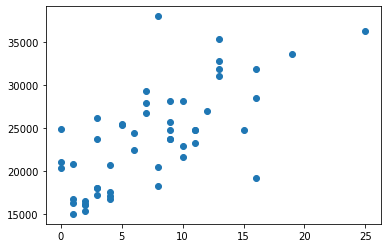

In [22]:
plt.scatter(df['Year'],df['Salary'])


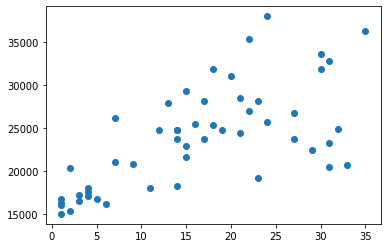

In [23]:
plt.scatter(df['YSdeg'],df['Salary'])

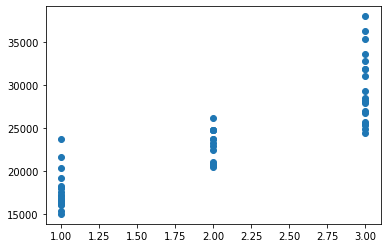

In [24]:
plt.scatter(df['Rank'], df['Salary'])

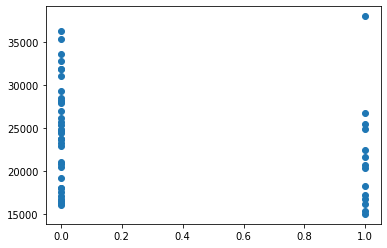

In [25]:
plt.scatter(df['Sex'],df['Salary'])

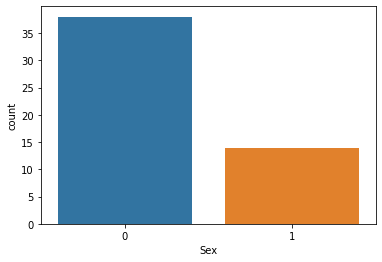

In [26]:
sns.countplot(x='Sex', data=df)

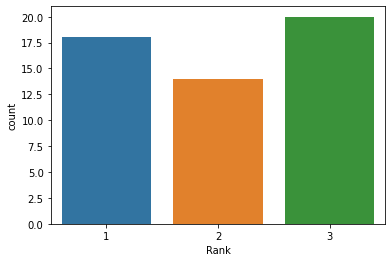

In [27]:
sns.countplot(x = 'Rank',data=df)

In [28]:
x = df.drop(['Salary','Sex','YSdeg'], axis =1)
y = df['Salary']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=4457821)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_train)
print('training_score:' ,lr.score(x_train,y_train))
print('R^2:', metrics.r2_score(y_train,y_pred))

training_score: 0.844376122288003
R^2: 0.844376122288003


In [32]:
y_pred = lr.predict(x_test)
print('testing_score:', lr.score(x_test,y_test))
print('R^2:', metrics.r2_score(y_test,y_pred))

testing_score: 0.813974410021719
R^2: 0.813974410021719


In [33]:
Gender_df = df.groupby('Sex')

In [34]:
female_df = Gender_df.get_group(0)
female_df.shape

(38, 6)

In [35]:
male_df = Gender_df.get_group(1)
male_df.shape

(14, 6)

In [36]:
female_df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850
10,0,3,12,1,22,27025
11,0,2,15,1,19,24750


In [37]:
male_df

,Sex,Rank,Year,Degree,YSdeg,Salary
3,1,3,7,1,27,26775
6,1,3,0,0,32,24900
23,1,3,8,1,24,38045
27,1,3,5,1,16,25500
30,1,1,10,0,15,21600
33,1,2,4,0,33,20690
34,1,2,6,0,29,22450
36,1,1,8,1,14,18304
43,1,1,3,1,3,17250
46,1,1,2,1,6,16150


In [38]:
female_df.loc[0]

Sex           0
Rank          3
Year         25
Degree        1
YSdeg        35
Salary    36350
Name: 0, dtype: int64

In [39]:
male_df.loc[23]

Sex           1
Rank          3
Year          8
Degree        1
YSdeg        24
Salary    38045
Name: 23, dtype: int64

In [40]:
comparison_df_rank3 = pd.DataFrame([female_df.loc[0],male_df.loc[23],female_df.loc[14],male_df.loc[27]])

In [41]:
comparison_df_rank3

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
23,1,3,8,1,24,38045
14,0,3,9,1,24,25748
27,1,3,5,1,16,25500


In [42]:
comparison_df_rank2 = pd.DataFrame([female_df.loc[31],female_df.loc[13],female_df.loc[11],
                                    female_df.loc[24],male_df.loc[33],male_df.loc[34]])

In [43]:
comparison_df_rank2

,Sex,Rank,Year,Degree,YSdeg,Salary
31,0,2,11,0,31,23300
13,0,2,9,0,27,23712
11,0,2,15,1,19,24750
24,0,2,9,1,12,24832
33,1,2,4,0,33,20690
34,1,2,6,0,29,22450


In [44]:
comparison_df_rank1 = pd.DataFrame([female_df.loc[20],female_df.loc[32],female_df.loc[37],female_df.loc[38],
                                    male_df.loc[30],male_df.loc[36],male_df.loc[43],male_df.loc[46]])

In [45]:
comparison_df_rank1_male_bias = pd.DataFrame([female_df.loc[20],male_df.loc[30]])

In [46]:
comparison_df_rank1_male_bias

,Sex,Rank,Year,Degree,YSdeg,Salary
20,0,1,16,0,23,19175
30,1,1,10,0,15,21600


In [47]:
comparison_df_rank1_Female_bias = pd.DataFrame([female_df.loc[32],male_df.loc[36]])

In [48]:
comparison_df_rank1_Female_bias

,Sex,Rank,Year,Degree,YSdeg,Salary
32,0,1,9,0,14,23713
36,1,1,8,1,14,18304
